![](header.jpg)

# QR Code

Kevin J. Walchko, PhD

15 Aug 2021

---

## References

- [decode a qr code](https://zxing.org/w/decode.jspx)
- [vCard format](https://tools.ietf.org/id/draft-ietf-vcarddav-vcardrev-02.html#toc)

# `qrcode`

- `version`: Accepts an integer from 1 to 40 which controls the size of the QR Code. The smallest version 1 has a dimension of 21 x 21.
- `box_size`: Determines the number of pixels for each box of the QR code.
- `border`: Determines the thickness of the border of the boxes. The default value is 4, which is the minimum size.
- `error_correction`: Controls the error correction used. It will be further explained in the next paragraph.
- `ERROR_CORRECT_L`: About 7% or fewer errors can be corrected.
- `ERROR_CORRECT_M`: About 15% or fewer errors can be corrected.(default value)
- `ERROR_CORRECT_Q`: About 25% or fewer errors can be corrected.
- `ERROR_CORRECT_H`: About 30% or fewer errors can be corrected.

<img src="qrcode.png" width="200px">

---

In [12]:
import qrcode
import cv2
from matplotlib import pyplot as plt

print(f"cv2 ver: {cv2.__version__}")

cv2 ver: 4.5.1


In [23]:
qr = qrcode.QRCode(
    # version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    # box_size=10,
    border=10,
)

data = """
BEGIN:VCARD
VERSION:4.0
N:Rogers;Mark;M.;Dr.;PhD
FN: Mark Rogers
EMAIL;WORK:mark.rogers@aol.com
TEL;work;pref:+1-111-111-1111
TEL;mobile:+1-222-222-2222
ORG:Americal Online
TITLE:Computer Engineer
URL;work:https://aol.com
URL;homepage:https://mark.rogers.github.io/
END:VCARD
"""

qr.add_data(data)
qr.make(fit=True)

In [24]:
img = qr.make_image(fill_color="grey", back_color="white")
img.save("qrcode.png")

## Decoding QR Code

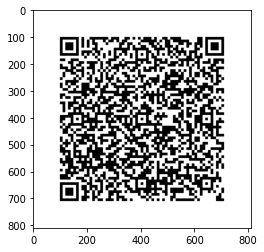

In [29]:
img = cv2.imread('qrcode.png',0)
plt.imshow(img, cmap="gray");

In [30]:
det = cv2.QRCodeDetector()
retval, points, _ = det.detectAndDecode(img)

print(retval)
print(points)


BEGIN:VCARD
VERSION:4.0
N:Rogers;Mark;M.;Dr.;PhD
FN: Mark Rogers
EMAIL;WORK:mark.rogers@aol.com
TEL;work;pref:+1-111-111-1111
TEL;mobile:+1-222-222-2222
ORG:Americal Online
TITLE:Computer Engineer
URL;work:https://aol.com
URL;homepage:https://mark.rogers.github.io/
END:VCARD

[[[100. 100.]
  [709. 100.]
  [709. 709.]
  [100. 709.]]]
